In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
import pytorch3d

import PIL
import PIL.ImageDraw as ImageDraw  # needed for getrgb()

# Goal: use open3d to acheive the same like pytorch3d

In [3]:
from libvista import epylab
from libvista.geometry import SimpleMesh, CameraManager, projection, visualize_mesh

In [4]:
from libvista.geometry.open3d_utils import (
    get_material, RenderContext
)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [5]:
from libvista.geometry import example_meshes

class Shapes:
    def __init__(self):
        pass
    
    @property
    def tetrahedron(self):
        return example_meshes.pivot_simplex(
            x=0, y=0, z=10)

    @property
    def cube1(self):
        """ Top-Left """
        fx = 10
        return example_meshes.canonical_cuboids(
            x=1, y=1, z=2*fx + 1,
            w=2, h=2, d=2,
            convention='opengl',
            return_mesh=True,
        )

    @property
    def cube2(self):
        """ Bottom-right, smaller """
        fx = 10
        return example_meshes.canonical_cuboids(
            x=-1, y=-1, z=2*fx + 1,
            w=2, h=2, d=2,
            convention='opengl',
            return_mesh=True,
        )
    
    @property
    def cube3(self):
        """ Middle """
        return example_meshes.canonical_cuboids(
            x=1, y=2, z=5,
            w=2, h=2, d=2,
            convention='opencv',
            return_mesh=True
        )
    
    @property
    def cube1_close(self):
        """ Top-Left """
        fx = 1
        return example_meshes.canonical_cuboids(
            x=1, y=1, z=2*fx + 1,
            w=2, h=2, d=2,
            convention='opengl',
            return_mesh=True,
        )
    
    @property
    def cube2_close(self):
        """ Bottom-right, smaller """
        fx = 1
        return example_meshes.canonical_cuboids(
            x=-1, y=-1, z=2*fx + 1,
            w=2, h=2, d=2,
            convention='opengl',
            return_mesh=True,
        )
    

_shapes = Shapes()

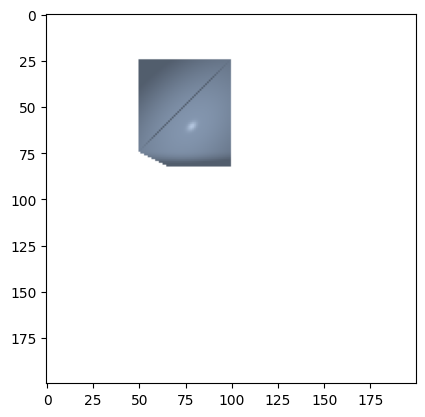

In [27]:
img = projection.perspective_projection(
    _shapes.cube3,
    cam_f=(100,100),
    cam_p=(100,100),
    method=dict(
        name='pytorch3d',
        in_ndc=False
    ),
    img_h=200,
    img_w=200,
)

epylab.imshow(img)

[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x68bd43f0 (threading is enabled)
EGL(1.5)
OpenGL(4.1)


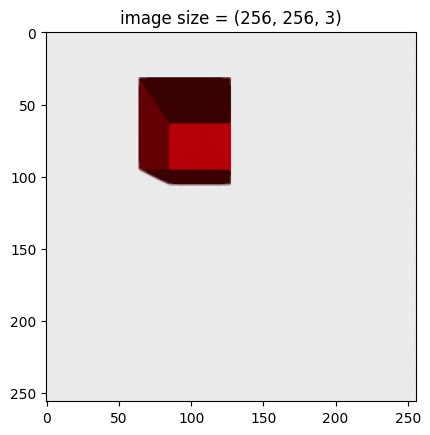

In [24]:
cam = CameraManager(fx=100, fy=100, cx=100, cy=100, img_h=200, img_w=200)
with RenderContext(256, 256) as ctx:
    img = ctx.render_by_camera([_shapes.cube3], cam, in_coor_sys='pytorch3d')

epylab.eimshow(img)

# Importing stuff

In [3]:
from libvista import epylab
from libvista.geometry import example_meshes
from libvista.geometry import projection
from libvista.geometry import SimpleMesh
from libvista.geometry import CameraManager

## with in_ndc=True camera

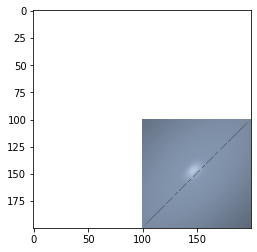

In [5]:
image_size = (200, 200)
fx = 10

img = projection.perspective_projection_by_camera(
    _shapes.cube1,
    CameraManager(fx, fx, cx=0, cy=0, img_h=200, img_w=200, in_ndc=True),
    method=dict(
        name='pytorch3d',
        in_ndc=False,
        coor_sys='neural_renderer',
    )
)

epylab.imshow(img)

## With in_ndc=False Camera

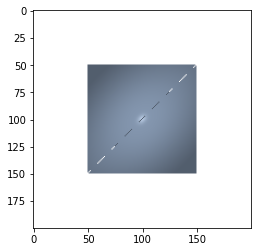

In [6]:
image_size = (200, 200)

img = projection.perspective_projection(
    _shapes.cube3,
    cam_f=(100,100),
    cam_p=(100,100),
    method=dict(
        name='pytorch3d',
        in_ndc=False
    ),
    img_h=200,
    img_w=200,
)

epylab.imshow(img)

## With naive implementation

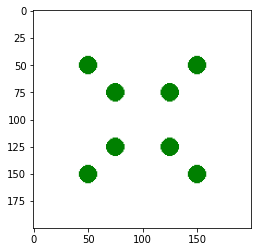

In [7]:
img = projection.perspective_projection(
    _shapes.cube3,
    cam_f=(100,100),
    cam_p=(100,100),
    method=dict(name='naive'),
    img_h=200,
    img_w=200,
)

epylab.imshow(img)

## Visualize cube with non-identity camera

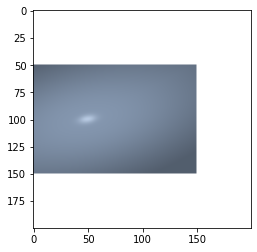

In [12]:
img = projection.perspective_projection(
    _shapes.cube3,
    cam_f=(2,1),
    cam_p=(0.5,0),
    method=dict(name='pytorch3d',
               in_ndc=True),
    img_h=200,
    img_w=200,
)

epylab.imshow(img)

# Neural Renderer

In neural renderer, set fx, fy to be normalized by REND_SIZE, then set orig_size=1

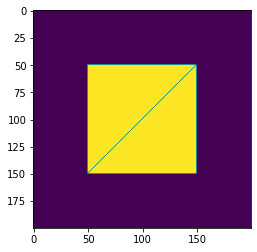

In [61]:
img = projection.perspective_projection(
    _shapes.cube3,
    cam_f=(100,100),
    cam_p=(100,100),
    method=dict(
        name='pytorch3d_silhouette',
        in_ndc=False
    ),
    img_h=200,
    img_w=200,
)

epylab.imshow(img)

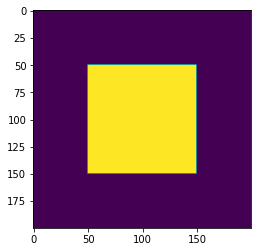

In [19]:
img = projection.perspective_projection(
    _shapes.cube3,
    cam_f=(100,100),
    cam_p=(100,100),
    method=dict(name='neural_renderer'),
    img_h=200,
    img_w=200,
)

epylab.imshow(img)

In [53]:
tetra = example_meshes.pivot_simplex(
            x=-2, y=-1, z=10)

In [54]:
from libvista.geometry import visualize_mesh

visualize_mesh(tetra, viewpoint='neural_renderer').show()

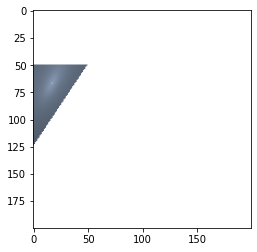

In [57]:
vv = np.asarray(tetra.vertices) * [-1, -1, 1]
ttetra = SimpleMesh(vv, tetra.faces)
img = projection.perspective_projection(
    ttetra,
    cam_f=(5*100,5*100),
    cam_p=(100,100),
    method=dict(
        name='pytorch3d',
        orig_size=200,
        in_ndc=False
    ),
    img_h=200,
    img_w=200,
)

epylab.imshow(img)

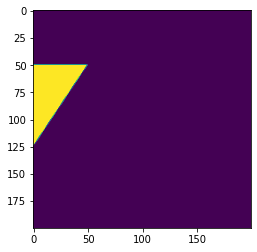

In [58]:
img = projection.perspective_projection(
    tetra,
    cam_f=(5*100,5*100),
    cam_p=(100,100),
    method=dict(
        name='neural_renderer',
        orig_size=200,
        in_ndc=False
    ),
    img_h=200,
    img_w=200,
)

epylab.imshow(img)

# Camera Cropping & Resizing Verification

Idea: 
- Step 0: Generate a scene with two cubes, one on top-left and one on bottom-right, calculate the two boxes for them, also calculate the global camera that produces this scene. The two cubes should have the same z value.
- Step 1a: Compute the local Camera for cube 1, in_ndc=True, so that that the cube occupies about 1/2 of the cropped region
- Step 1b: Compute the local Camera for cube 2, in_ndc=False, with a slightly different crop window size so that the cube occupies 1/4 only.
- Step 2: Compute the local camera 2 from local camera 1.

In [41]:
from libvista.geometry import perspective_projection_by_camera

import numpy as np
from libvista.geometry import CameraManager

H, W = 200, 400
image_size = (H, W)

global_cam = CameraManager(
    fx=10, fy=20, cx=0, cy=0, img_h=H, img_w=W,
    in_ndc=True)

H1, W1 = 200, 200
local_box_1 = np.asarray([0, 0, H1, W1]) # xywh
local_cam_1_exp = CameraManager(
    fx=20, fy=20, cx=1, cy=0, img_h=H1, img_w=W1,
    in_ndc=True)

H2, W2 = 100, 100
local_box_2 = np.asarray([200, 100, H2, W2]) # xywh
local_cam_2_exp = CameraManager(
    fx=40, fy=40, cx=-1, cy=-1, img_h=H2, img_w=W2,
    in_ndc=True)

cube_1 = example_meshes.canonical_cuboids(
    x=0.5, y=0, z=10.25,
    w=0.5, h=0.5, d=0.5,
    convention='pytorch3d'
)
cube_2 = example_meshes.canonical_cuboids(
    x=-0.375, y=-0.125, z=10.125,
    w=0.25, h=0.25, d=0.25,
    convention='pytorch3d'
)

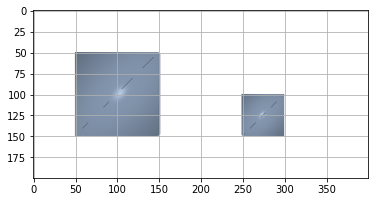

In [42]:
""" image rendered by Global camera """


img = projection.perspective_projection(
    [cube_1, cube_2],
    cam_f=(global_cam.fx, global_cam.fy),
    cam_p=(global_cam.cx, global_cam.cy),
    method=dict(
        name='pytorch3d',
        in_ndc=False,
    ),
    img_h=H,
    img_w=W,
)

epylab.imshow(img)
epylab.grid()

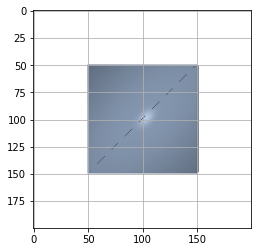

In [43]:
""" image rendered by Local camera 1 
x=0.5 => x_pix=100
x=0.75 => x_pix=150 (=50 after flip)

"""

img = perspective_projection_by_camera(
    [cube_1, cube_2],
    global_cam.crop(local_box_1))

epylab.imshow(img)
epylab.grid()

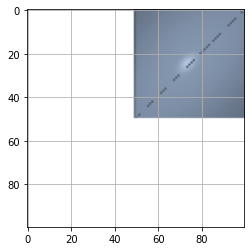

In [44]:
""" image rendered by Local camera 2 """

img = perspective_projection_by_camera(
    [cube_1, cube_2],
    global_cam.crop(local_box_2))

epylab.imshow(img)
epylab.grid()

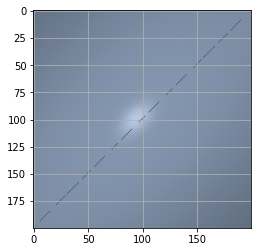

In [45]:
img = perspective_projection_by_camera(
    [cube_1, cube_2],
    global_cam.crop_and_resize([250, 100, 50, 50], 200))

epylab.imshow(img)
epylab.grid()

In [46]:
# Calculate local camera 1 from local camera 2

[-200. -100.  200.  200.]


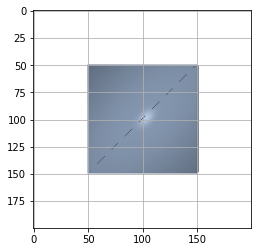

In [47]:
bbox_rel = np.zeros(4)
bbox_rel[:2] = local_box_1[:2] - local_box_2[:2]
bbox_rel[2:] = local_box_1[2:]
print(bbox_rel)
img = perspective_projection_by_camera(
    [cube_1, cube_2],
    local_cam_2_exp.crop(bbox_rel))

epylab.imshow(img)
epylab.grid()